## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [6]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from copy import deepcopy
import math
import os
mpb = MPB()
mpb["ompl.seed"] = -1  # set the seed of the OMPL planners
mpb.set_planners(['rrt_star'])
mpb.set_steer_functions(['car'])
mpb["steer.car_turning_radius"] = 1.0
mpb["steer.sampling_resolution"] = 0.01
mpb["max_planning_time"] = 10


folder_prefix = "/home/ksatyaki/workspace/bench_ws/src/bench-mr/"
mpb["env.collision.robot_shape_source"] = folder_prefix + "maps/simple_robot.yaml"
mpb.set_image_yaml_env(folder_prefix + "maps/atc.yaml")
cliff_map_file = folder_prefix + "maps/atc_cliff.xml"
intensity_map_file = folder_prefix + "maps/atc_intensity1m.xml"
gmmt_map_file = folder_prefix + "maps/atc_gmmt.xml"

cost_fns = ["cliff", "intensity", "dtc", "gmmt"]
cost_fn_map = { "dtc" : cliff_map_file, "cliff" : cliff_map_file, "intensity": intensity_map_file, "gmmt": gmmt_map_file }

#mpb.set_start(-5.0, 19.0, -math.pi / 4.0)
#mpb.set_goal(19.0, -5.0, -math.pi / 4.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lets run some tests on the cubicles map. . .

In [7]:
mpb["mod.weight_dtc"] = 0.02
mpb["mod.weight_cliff"] = 0.1
mpb["mod.weight_gmmt"] = 0.1
mpb["mod.weight_intensity"] = 0.2
mpb.set_start(47.690, -18.848, -2.356)
mpb.set_goal(-19.575, 12.390, 2.313)

results_folder_prefix = "mod-tests-atc1"

try:
    os.mkdir(results_folder_prefix)
except FileExistsError as fxe:
    print("Folder {} exists, not creating...".format(results_folder_prefix))

mpbs = dict()
result_file_names = []
for cost_fn in cost_fns:  
  
    dijkstra_mpb = deepcopy(mpb)
    dijkstra_mpb["ompl.sampler"] = "dijkstra"
    dijkstra_mpb["mod.dijkstra_cell_size"] = 0.5
    dijkstra_mpb["mod.sampling_bias"] = 0.05
    dijkstra_mpb.set_id('{}-{}'.format(cost_fn, 'dijkstra'))
    dijkstra_mpb["ompl.intensity_map_file_name"] = intensity_map_file
    dijkstra_mpb["ompl.optimization_objective"] = cost_fn
    dijkstra_mpb["mod.mod_file_name"] = cost_fn_map[cost_fn]
    mpbs['{}-{}'.format(cost_fn, 'dijkstra')] = dijkstra_mpb
    result_file_names.append("{}/{}-{}_results.json".format(results_folder_prefix, cost_fn, 'dijkstra'))
    
    uniform_mpb = deepcopy(mpb)
    uniform_mpb["ompl.sampler"] = "iid"
    uniform_mpb.set_id('{}-{}'.format(cost_fn, 'uniform'))
    uniform_mpb["ompl.intensity_map_file_name"] = intensity_map_file
    uniform_mpb["ompl.optimization_objective"] = cost_fn
    uniform_mpb["mod.mod_file_name"] = cost_fn_map[cost_fn]
    mpbs['{}-{}'.format(cost_fn, 'uniform')] = uniform_mpb
    result_file_names.append("{}/{}-{}_results.json".format(results_folder_prefix, cost_fn, 'uniform'))

Run the motion planning benchmark:

In [8]:
for key in mpbs:
  mpbs[key].run(id=key, runs=20, subfolder=folder_prefix + "/python/{}".format(results_folder_prefix))

Running MPB with ID cliff-dijkstra (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/cliff-dijkstra.log)...


cliff-dijkstra: 100%|███████████████████████████████████████████████████████████████████| 20/20 [04:15<00:00, 12.75s/it]


Running MPB with ID cliff-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/cliff-uniform.log)...


cliff-uniform: 100%|████████████████████████████████████████████████████████████████████| 20/20 [04:13<00:00, 12.66s/it]


Running MPB with ID intensity-dijkstra (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/intensity-dijkstra.log)...


intensity-dijkstra: 100%|███████████████████████████████████████████████████████████████| 20/20 [04:09<00:00, 12.49s/it]


Running MPB with ID intensity-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/intensity-uniform.log)...


intensity-uniform: 100%|████████████████████████████████████████████████████████████████| 20/20 [04:10<00:00, 12.53s/it]


Running MPB with ID dtc-dijkstra (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/dtc-dijkstra.log)...


dtc-dijkstra: 100%|█████████████████████████████████████████████████████████████████████| 20/20 [04:17<00:00, 12.85s/it]


Running MPB with ID dtc-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/dtc-uniform.log)...


dtc-uniform: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [04:10<00:00, 12.52s/it]


Running MPB with ID gmmt-dijkstra (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/gmmt-dijkstra.log)...


gmmt-dijkstra: 100%|████████████████████████████████████████████████████████████████████| 20/20 [04:05<00:00, 12.27s/it]


Running MPB with ID gmmt-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-atc1/gmmt-uniform.log)...


gmmt-uniform: 100%|█████████████████████████████████████████████████████████████████████| 20/20 [04:06<00:00, 12.31s/it]


In [9]:
MPB.merge(result_file_names, target_filename="{}/combined.json".format(results_folder_prefix, results_folder_prefix), plan_names=list(mpbs.keys()))

Successfully merged [mod-tests-atc1/cliff-dijkstra_results.json, mod-tests-atc1/cliff-uniform_results.json, mod-tests-atc1/intensity-dijkstra_results.json, mod-tests-atc1/intensity-uniform_results.json, mod-tests-atc1/dtc-dijkstra_results.json, mod-tests-atc1/dtc-uniform_results.json, mod-tests-atc1/gmmt-dijkstra_results.json, mod-tests-atc1/gmmt-uniform_results.json] into mod-tests-atc1/combined.json.


Visualize the planner trajectories:

Visualizing mod-tests-atc1/combined.json


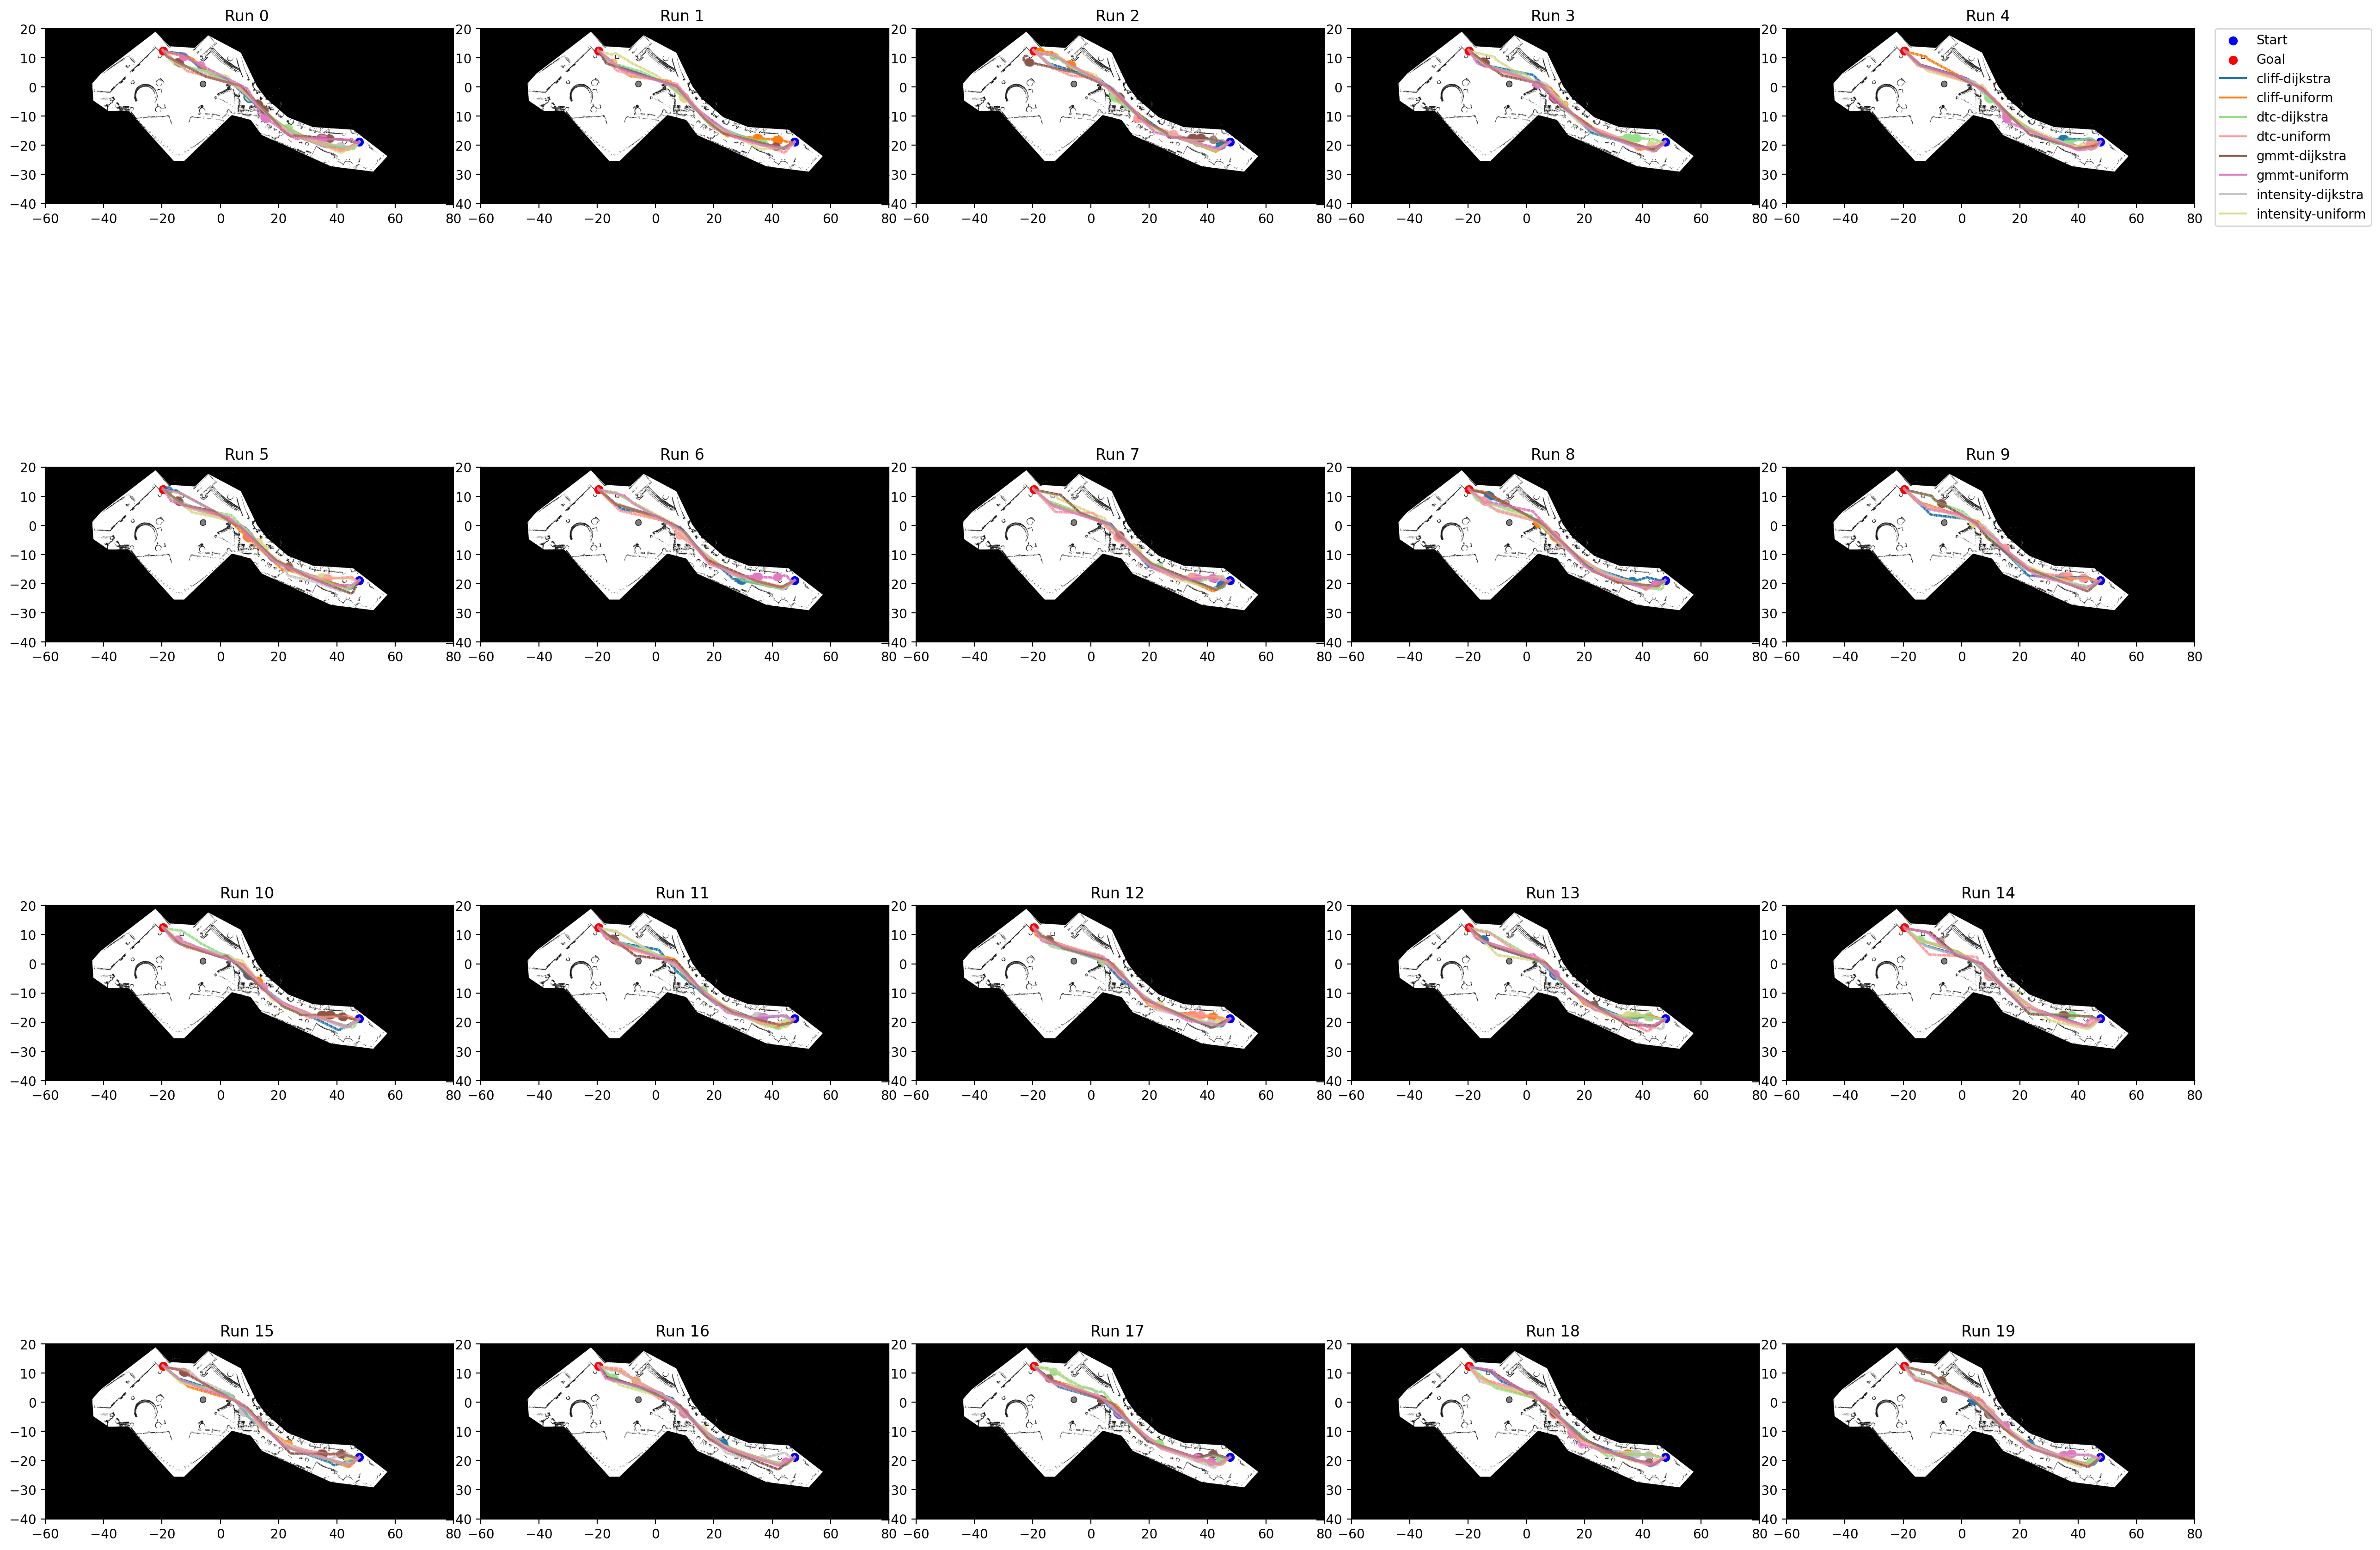

In [12]:
from trajectory import visualize
visualize('{}/combined.json'.format(results_folder_prefix))

Plot planner statistics:

Visualizing mod-tests-atc1/combined.json...


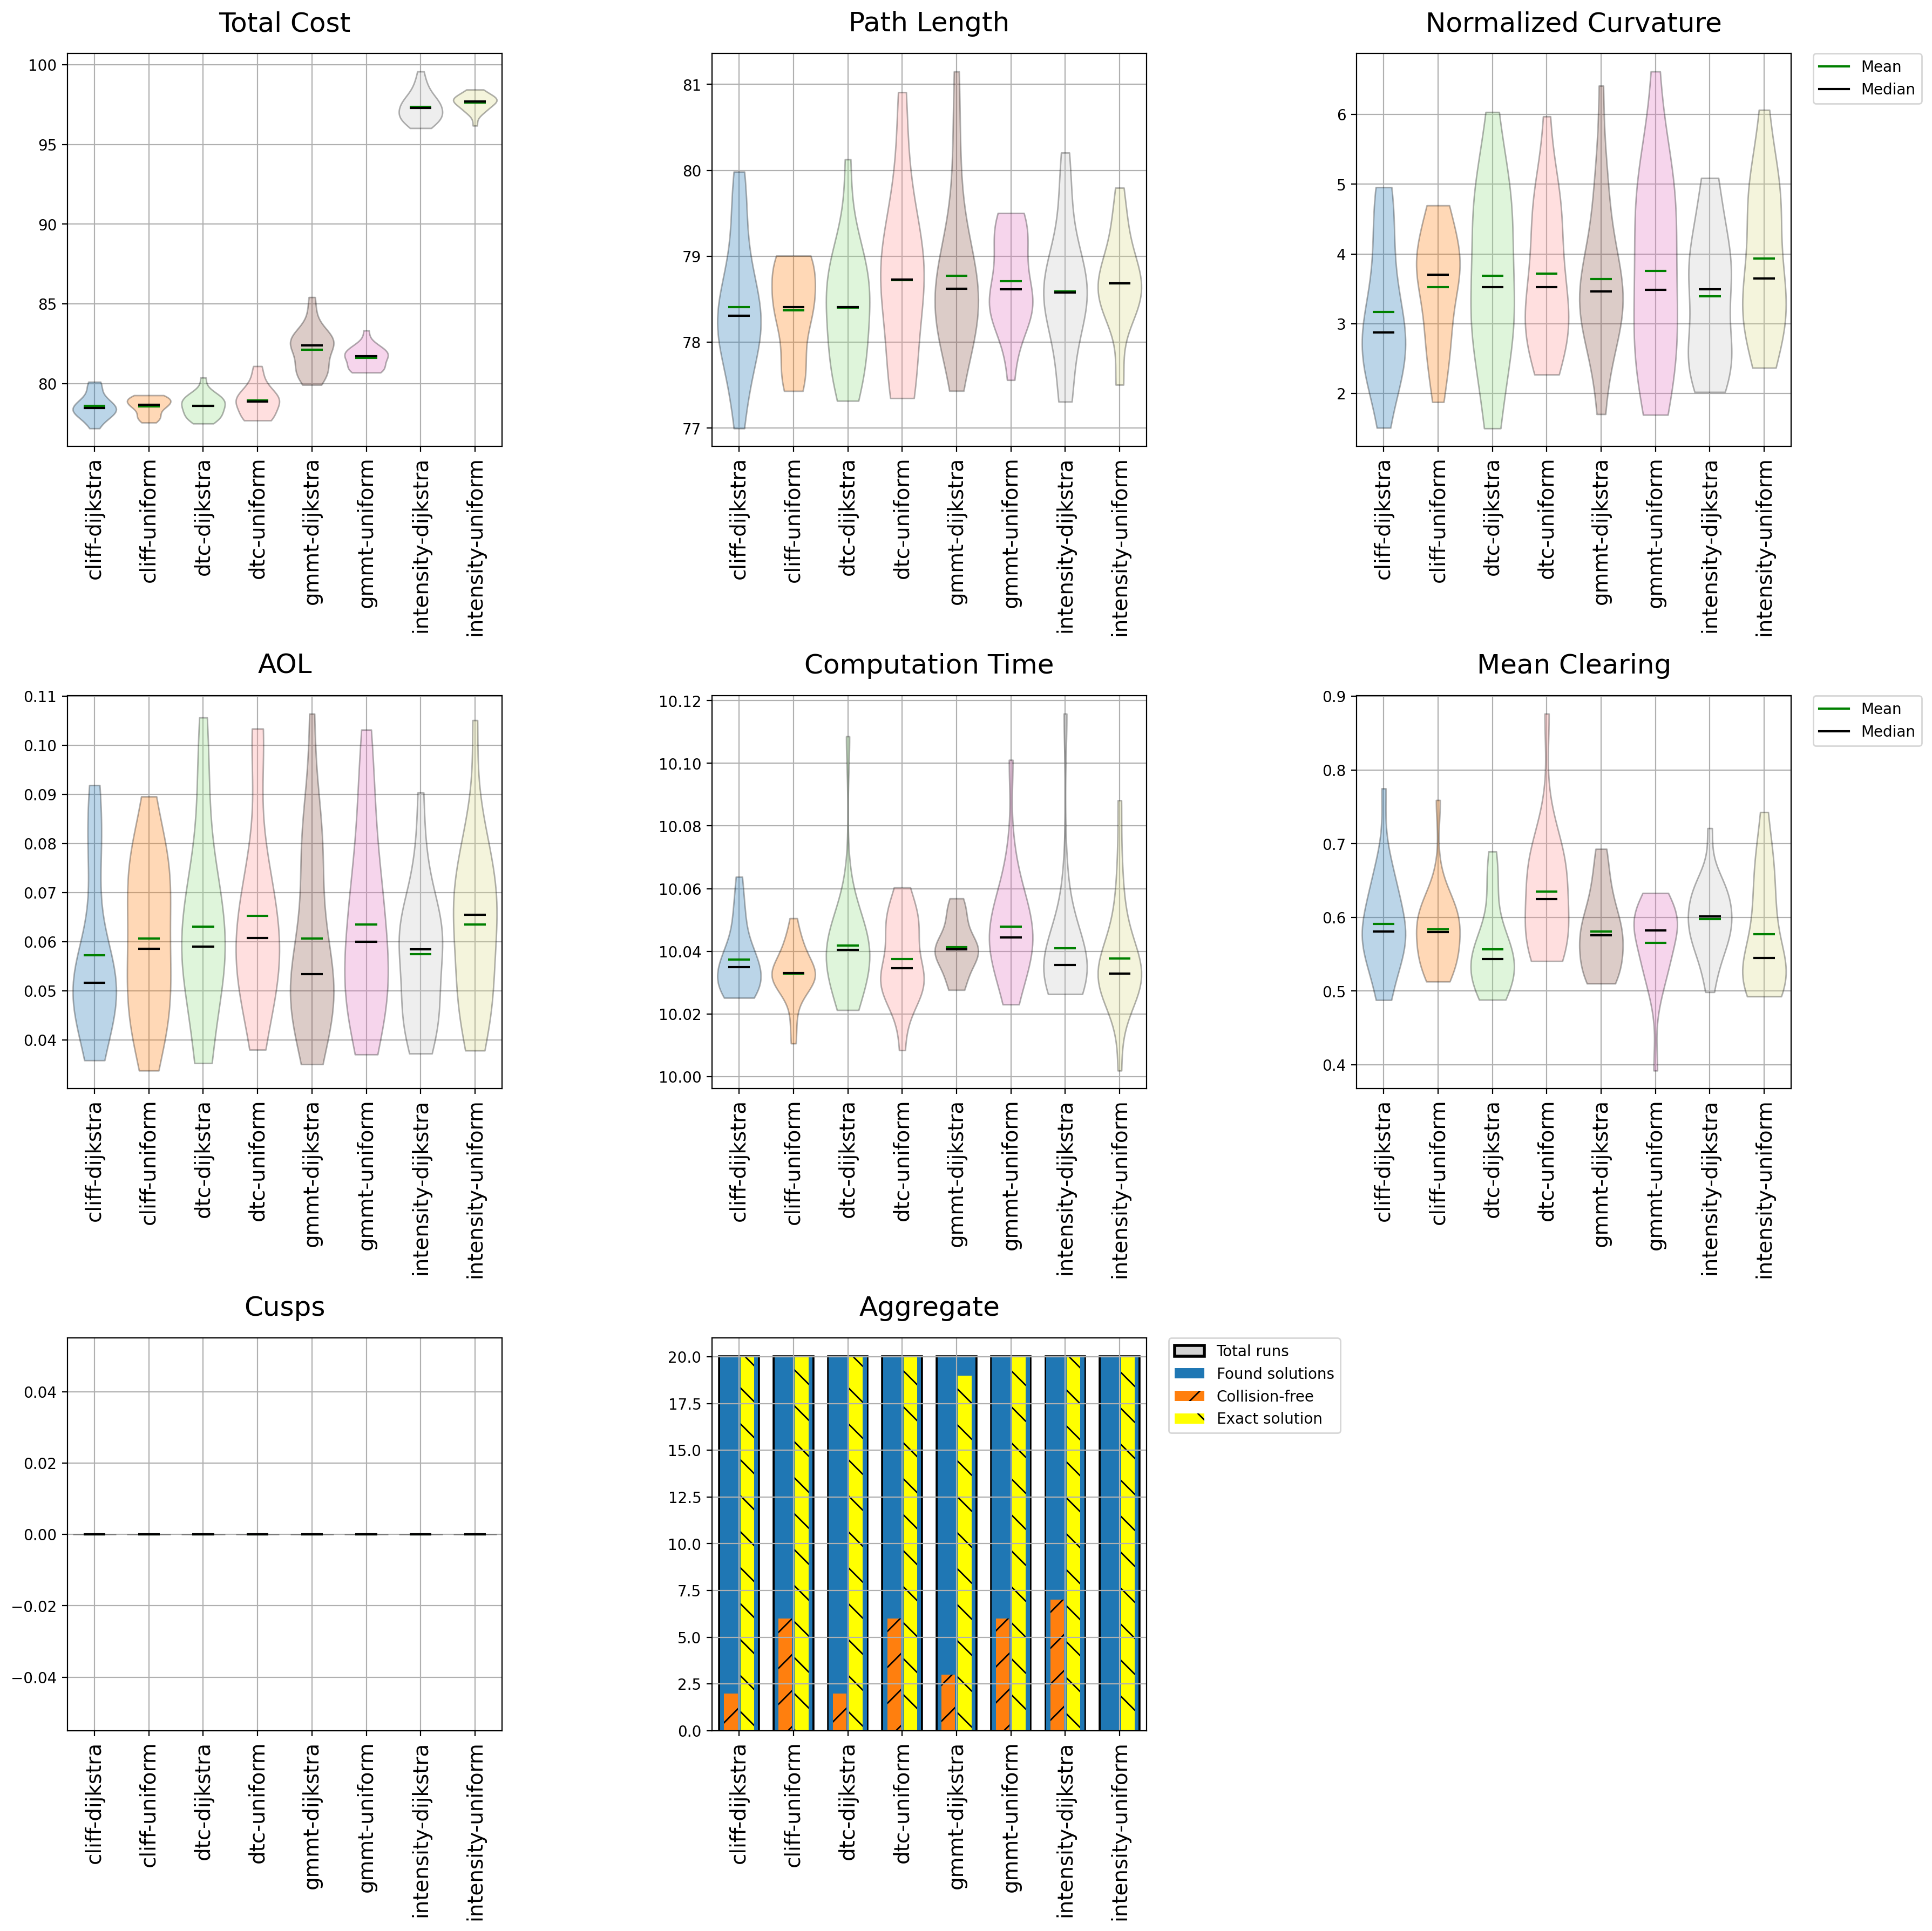

In [13]:
from plot_stats import plot_planner_stats
plot_planner_stats('{}/combined.json'.format(results_folder_prefix), num_colors=8, ticks_rotation=90)